# Importing Libraries needed for this Assignment

In [1]:
import os
import requests
import matplotlib
import urllib
import zipfile
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Download .zip file from server and save locally

In [2]:
import requests, zipfile, io
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip'  
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall('data')

# Ingestion

In [3]:
df = pd.read_csv("data/bank-full.csv", sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Begin analysis by obtaining summary statistics

In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


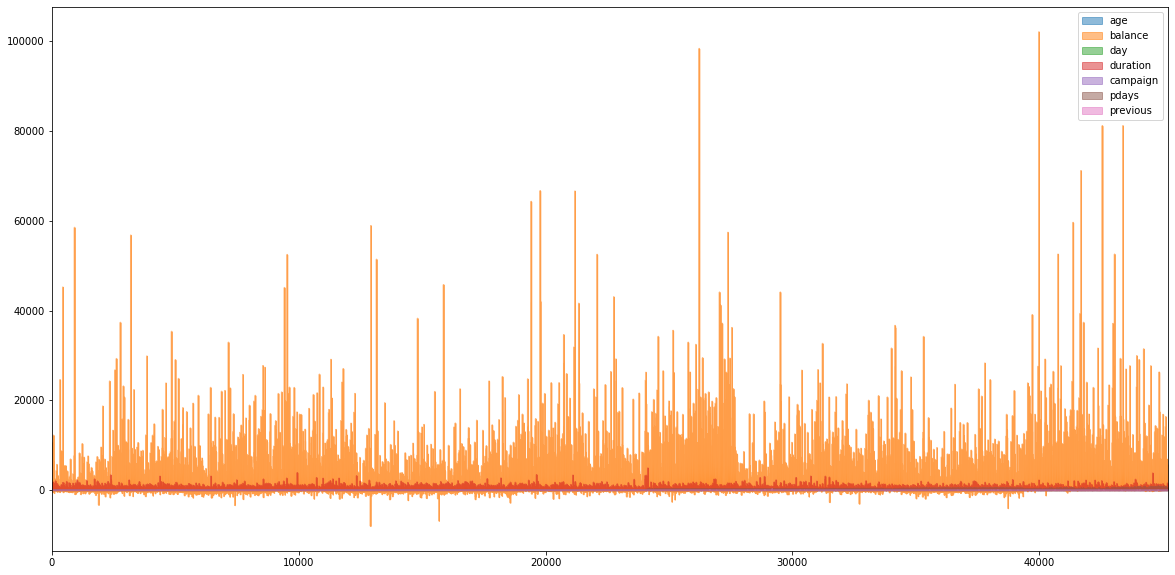

In [5]:
df.plot(kind='area', stacked=False,figsize=[20,10])

# sklearn Label Encoder for data transforming
This data set has both catergorical and binary data.  In order to perform machine leraning at the next phase of analysis, all data must be transformed into numerical data.

In [6]:
#Assign numerical vaules to "job" header

In [7]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df["job"])
list(le.classes_)
le.transform(df["job"])
df["job"] = le.transform(df["job"])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,9,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,2,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,1,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,11,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Assign numerical values to "marital" header

In [8]:
le = preprocessing.LabelEncoder()
le.fit(df["marital"])
list(le.classes_)
le.transform(df["marital"])
df["marital"] = le.transform(df["marital"])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,9,2,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,2,1,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,1,1,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,11,2,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Assign numerical values to "education" header

In [9]:
le = preprocessing.LabelEncoder()
le.fit(df["education"])
list(le.classes_)
le.transform(df["education"])
df["education"] = le.transform(df["education"])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,9,2,1,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,2,1,1,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,1,1,3,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,11,2,3,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Assign numerical values to "default" header

In [10]:
le = preprocessing.LabelEncoder()
le.fit(df["default"])
list(le.classes_)
le.transform(df["default"])
df["default"] = le.transform(df["default"])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,9,2,1,0,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,2,1,1,0,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,1,1,3,0,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,11,2,3,0,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


# Assign numerical values to "housing" header

In [11]:
le = preprocessing.LabelEncoder()
le.fit(df["housing"])
list(le.classes_)
le.transform(df["housing"])
df["housing"] = le.transform(df["housing"])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,9,2,1,0,29,1,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,2,1,1,0,2,1,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,1,1,3,0,1506,1,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,11,2,3,0,1,0,no,unknown,5,may,198,1,-1,0,unknown,no


# Assign numerical values to "loan" header

In [12]:
le = preprocessing.LabelEncoder()
le.fit(df["loan"])
list(le.classes_)
le.transform(df["loan"])
df["loan"] = le.transform(df["loan"])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,no
1,44,9,2,1,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,no
2,33,2,1,1,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,no
3,47,1,1,3,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,no
4,33,11,2,3,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,no


# Assign numerical values to "contact" header

In [13]:
le = preprocessing.LabelEncoder()
le.fit(df["contact"])
list(le.classes_)
le.transform(df["contact"])
df["contact"] = le.transform(df["contact"])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,may,261,1,-1,0,unknown,no
1,44,9,2,1,0,29,1,0,2,5,may,151,1,-1,0,unknown,no
2,33,2,1,1,0,2,1,1,2,5,may,76,1,-1,0,unknown,no
3,47,1,1,3,0,1506,1,0,2,5,may,92,1,-1,0,unknown,no
4,33,11,2,3,0,1,0,0,2,5,may,198,1,-1,0,unknown,no


# Assign numerical values to "month" header

In [14]:
le = preprocessing.LabelEncoder()
le.fit(df["month"])
list(le.classes_)
le.transform(df["month"])
df["month"] = le.transform(df["month"])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,unknown,no
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,unknown,no
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,unknown,no
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,unknown,no
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,unknown,no


# Assign numerical values to "poutcome" header

In [15]:
le = preprocessing.LabelEncoder()
le.fit(df["poutcome"])
list(le.classes_)
le.transform(df["poutcome"])
df["poutcome"] = le.transform(df["poutcome"])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,no
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,no
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,no
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,no
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,no


# Assign numerical values to "y" header

In [16]:
le = preprocessing.LabelEncoder()
le.fit(df["y"])
list(le.classes_)
le.transform(df["y"])
df["y"] = le.transform(df["y"])
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


# Perform feature analysis through Yellowbrick to gain further insights on the dataset

In [17]:
import yellowbrick as yb

# Analyze data to explore seperability

# Radviz

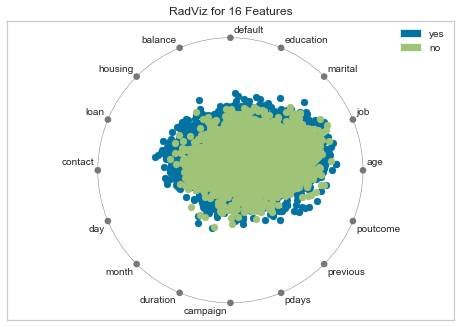

In [18]:
from yellowbrick.features import RadViz

# Load the classification dataset
X = df
X = X.drop('y', axis=1)
y = df["y"]

# Specify the target classes
classes = ["yes", "no"]

# Instantiate the visualizer
visualizer = RadViz(classes=classes)

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure

# Rank 2D - "Pearson"

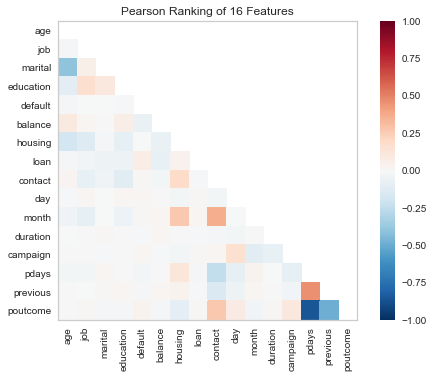

In [19]:
from yellowbrick.features import Rank2D

X = df
X = X.drop('y', axis=1)
y = df["y"]

# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(algorithm='pearson')

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure

# Rank 2D - "Covariance"

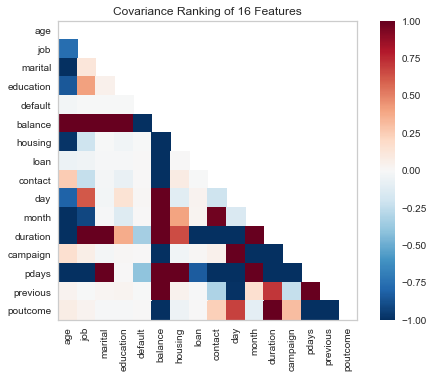

In [20]:
from yellowbrick.features import Rank2D

X = df
X = X.drop('y', axis=1)
y = df["y"]

# Instantiate the visualizer with the covariance ranking algorithm
visualizer = Rank2D(algorithm='covariance')

visualizer.fit(X, y)           # Fit the data to the visualizer
visualizer.transform(X)        # Transform the data
visualizer.show()              # Finalize and render the figure

# Parallel Coordinates

In [21]:
from sklearn.model_selection import train_test_split
X = df
X = X.drop('y', axis=1)
y = df["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training Dataset Output

In [22]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
10747,36,9,2,2,0,0,0,0,2,17,6,153,4,-1,0,3
26054,56,2,1,1,0,196,0,0,0,19,9,312,3,-1,0,3
9125,46,1,1,1,0,0,1,0,2,5,6,83,2,-1,0,3
41659,41,4,0,2,0,3426,0,0,0,1,10,302,1,119,5,2
4443,38,1,1,1,0,0,1,0,2,20,8,90,1,-1,0,3


# Test Dataset Output

In [23]:
X_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
3776,40,1,1,1,0,580,1,0,2,16,8,192,1,-1,0,3
9928,47,7,2,1,0,3644,0,0,2,9,6,83,2,-1,0,3
33409,25,8,2,2,0,538,1,0,0,20,0,226,1,-1,0,3
31885,42,4,1,2,0,1773,0,0,0,9,0,311,1,336,1,0
15738,56,4,1,2,0,217,0,1,0,21,5,121,2,-1,0,3


# PCA Projection

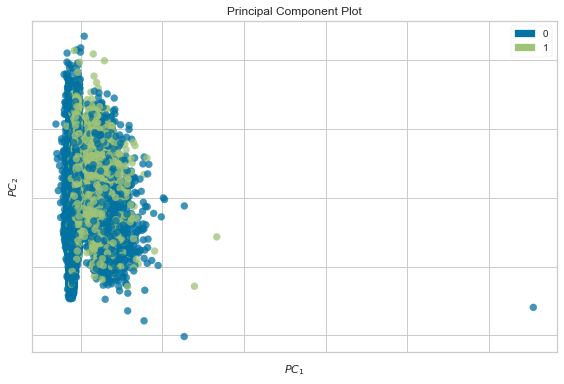

In [24]:
from yellowbrick.features.pca import PCADecomposition

# Specify the features of interest and the target
# X, y = load_credit()
X = df
X = X.drop('y', axis=1)
y = df["y"]

# Create a list of colors to assign to points in the plot
colors = np.array(['r' if yi else 'b' for yi in y])

visualizer = PCADecomposition(scale=True, color=colors)
visualizer.fit_transform(X, y)
visualizer.show()

# Biplot

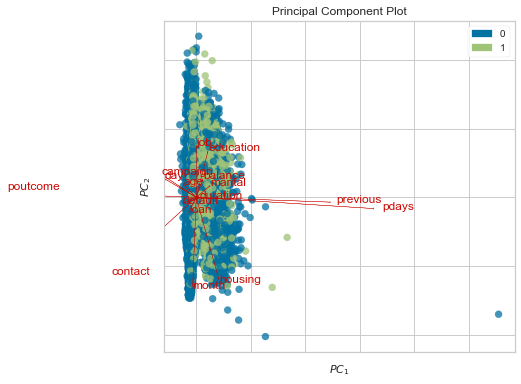

In [25]:
from yellowbrick.features.pca import PCADecomposition

# Load the concrete dataset
X = df
X = X.drop('y', axis=1)
y = df["y"]

visualizer = PCADecomposition(scale=True, proj_features=True)
visualizer.fit_transform(X, y)
visualizer.show()

# Direct Data Visualization - Joint Plot

# Single Feature

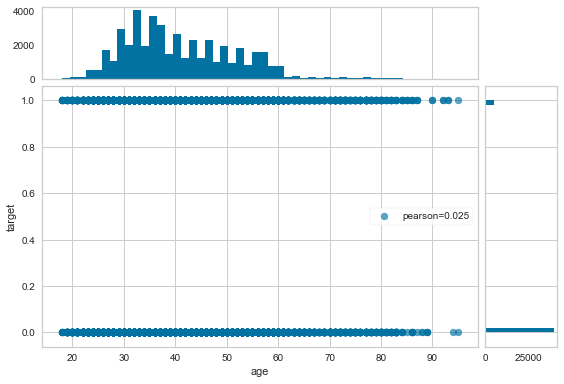

In [26]:
from yellowbrick.features import JointPlotVisualizer

# Load the dataset
X = df
X = X.drop('y', axis=1)
y = df["y"]

# Instantiate the visualizer
visualizer = JointPlotVisualizer(columns="age")

visualizer.fit_transform(X, y)        # Fit and transform the data
visualizer.show()                     # Finalize and render the figure

# Two Features

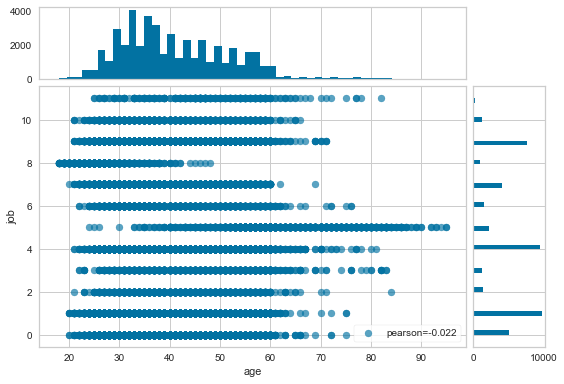

In [27]:
from yellowbrick.features import JointPlotVisualizer

# Load the dataset
X = df
X = X.drop('y', axis=1)
y = df["y"]

# Instantiate the visualizer
visualizer = JointPlotVisualizer(columns=["age", "job"])

visualizer.fit_transform(X, y)        # Fit and transform the data
visualizer.show()                     # Finalize and render the figure

# Multi-Feature (hexbin)

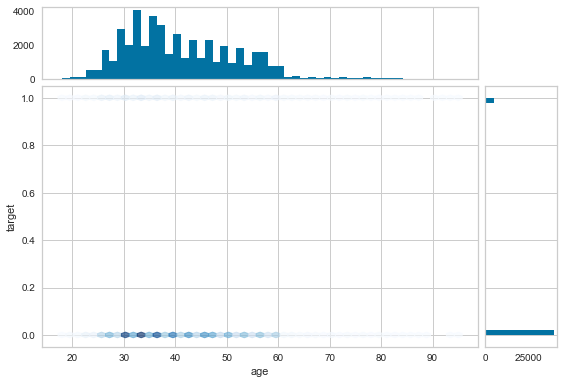

In [28]:
from yellowbrick.features import JointPlotVisualizer

# Load the dataset
X = df
X = X.drop('y', axis=1)
y = df["y"]

# Instantiate the visualizer
visualizer = JointPlotVisualizer(columns="age", kind="hexbin")

visualizer.fit_transform(X, y)        # Fit and transform the data
visualizer.show()                     # Finalize and render the figure

# scikit-learn models

# Run a split to create a training data set. This will be used later for the scikit-learn models

In [29]:
from sklearn.model_selection import train_test_split
X = df
X = X.drop('y', axis=1)
y = df["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Training Dataset Output

In [30]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
10747,36,9,2,2,0,0,0,0,2,17,6,153,4,-1,0,3
26054,56,2,1,1,0,196,0,0,0,19,9,312,3,-1,0,3
9125,46,1,1,1,0,0,1,0,2,5,6,83,2,-1,0,3
41659,41,4,0,2,0,3426,0,0,0,1,10,302,1,119,5,2
4443,38,1,1,1,0,0,1,0,2,20,8,90,1,-1,0,3


# Test Dataset Output

In [31]:
X_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
3776,40,1,1,1,0,580,1,0,2,16,8,192,1,-1,0,3
9928,47,7,2,1,0,3644,0,0,2,9,6,83,2,-1,0,3
33409,25,8,2,2,0,538,1,0,0,20,0,226,1,-1,0,3
31885,42,4,1,2,0,1773,0,0,0,9,0,311,1,336,1,0
15738,56,4,1,2,0,217,0,1,0,21,5,121,2,-1,0,3


# Classification Report

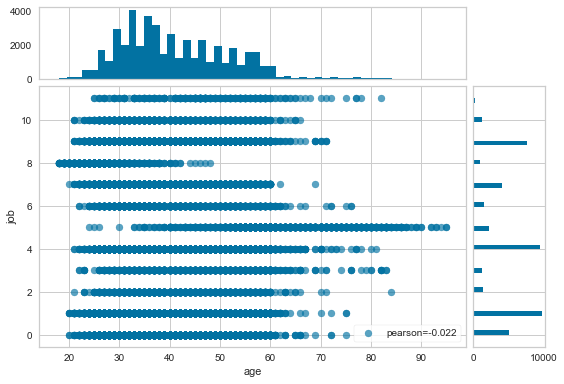

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:784: FutureWarning: The default value of n_split will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(NSPLIT_WARNING, FutureWarning)


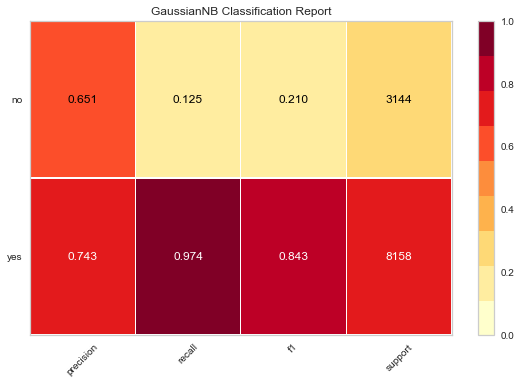

In [32]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.naive_bayes import GaussianNB

from yellowbrick.classifier import ClassificationReport

# Load the classification dataset
from yellowbrick.features import JointPlotVisualizer

# Load the dataset
X = df
X = X.drop('y', axis=1)
y = df["y"]

# Instantiate the visualizer
visualizer = JointPlotVisualizer(columns=["age", "job"])

visualizer.fit_transform(X, y)        # Fit and transform the data
visualizer.show()                     # Finalize and render the figure

# Specify the target classes
classes = ["yes", "no"]

# Create the training and test data
tscv = TimeSeriesSplit()
for train_index, test_index in tscv.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

# Instantiate the classification model and visualizer
model = GaussianNB()
visualizer = ClassificationReport(model, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

# Confusion Matrix

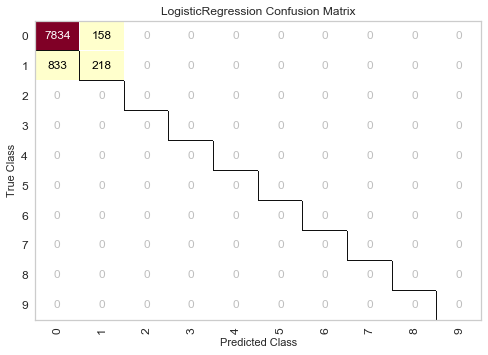

In [33]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix

# We'll use the handwritten digits data set from scikit-learn.
# Each feature of this dataset is an 8x8 pixel image of a handwritten number.
# Digits.data converts these 64 pixels into a single array of features
#digits = load_digits()
#X = digits.data
#y = digits.target

X = df
X = X.drop('y', axis=1)
y = df["y"]

X_train, X_test, y_train, y_test = tts(X, y, test_size =0.2, random_state=11)

model = LogisticRegression(multi_class="auto", solver="liblinear")

# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(model, classes=[0,1,2,3,4,5,6,7,8,9])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.show()

# ROCAUC - (Receiver Operating Characteristic/Area Under the Curve)

# ROCAUC - LogisticRegression

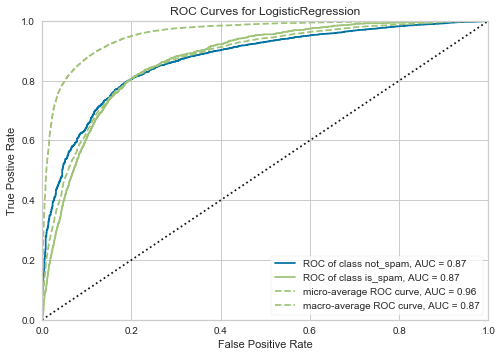

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from yellowbrick.classifier import ROCAUC

# Load the classification dataset
X = df
X = X.drop('y', axis=1)
y = df["y"]

# Create the training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Instantiate the visualizer with the classification model
model = LogisticRegression(multi_class="auto", solver="liblinear")
visualizer = ROCAUC(model, classes=["not_spam", "is_spam"])

visualizer.fit(X_train, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

# Precision-Recall Curves

# Binary Classification

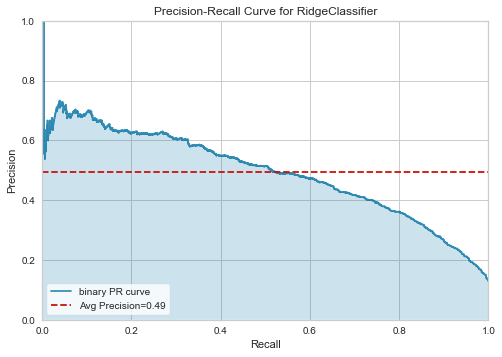

In [35]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import PrecisionRecallCurve

# Load the dataset and split into train/test splits
X = df
X = X.drop('y', axis=1)
y = df["y"]

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, shuffle=True)

# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(RidgeClassifier())
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

# Multi-Label Classification

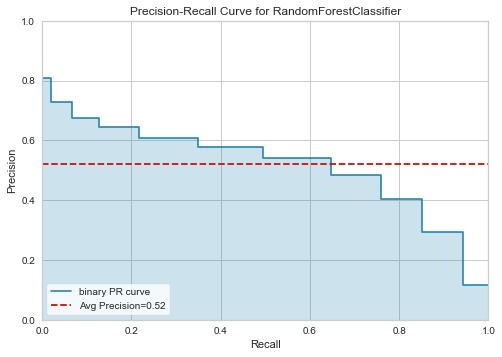

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import PrecisionRecallCurve


# Load dataset and encode categorical variables
X = df
X = X.drop('y', axis=1)
y = df["y"]

X = OrdinalEncoder().fit_transform(X)
y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, shuffle=True)

# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(RandomForestClassifier(n_estimators=10))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

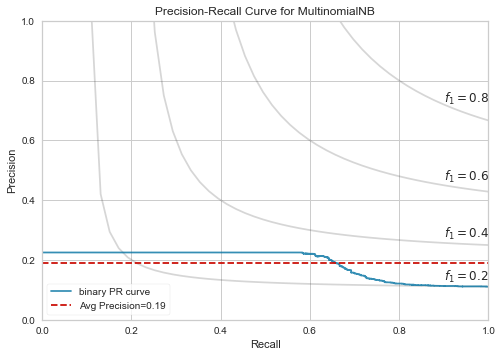

In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import PrecisionRecallCurve


# Load dataset and encode categorical variables
X = df
X = X.drop('y', axis=1)
y = df["y"]
X = OrdinalEncoder().fit_transform(X)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, shuffle=True)

# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(
    MultinomialNB(), per_class=True, iso_f1_curves=True,
    fill_area=False, micro=False, classes=encoder.classes_
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

# Class Prediction Error

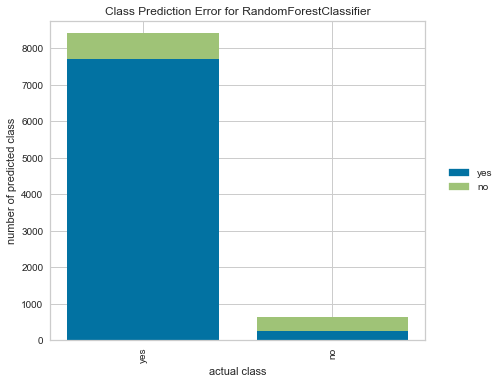

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassPredictionError


# Create classification dataset
X = df
X = X.drop('y', axis=1)
y = df["y"]
#X, y = make_classification(
#    n_samples=1000, n_classes=5, n_informative=3, n_clusters_per_class=1,
#    random_state=36,
#)

classes = ["yes", "no"]

# Perform 80/20 training/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    random_state=42)
# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(
    RandomForestClassifier(random_state=42, n_estimators=10), classes=classes
)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show()

# Discrimination Threshold

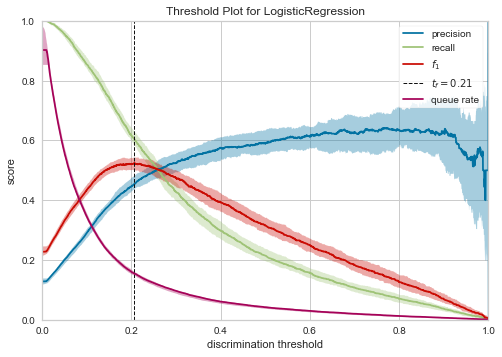

In [39]:
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import DiscriminationThreshold

# Load a binary classification dataset
X = df
X = X.drop('y', axis=1)
y = df["y"]

# Instantiate the classification model and visualizer
model = LogisticRegression(multi_class="auto", solver="liblinear")
visualizer = DiscriminationThreshold(model)

visualizer.fit(X, y)        # Fit the data to the visualizer
visualizer.show()           # Finalize and render the figure

# Next Steps
Further analysis would require that I have more computing power in order to run Manifold Visualizations.  Although splitting the data set into both a test data and training data was an option, this still created issues with the model running slow.